# Build a CNN for image recognition.

### Name: Manojkumar Venkatesan


## Objectives

Build Convolutional Neural Network to classify CIFAR-10 Images.


## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

### 1.1. Load data


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
from sklearn.model_selection import train_test_split
from keras import datasets
import numpy as np

### If you can not load keras dataset, un-comment these two lines.
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(train, trainlabels), (xtest, ytest) = datasets.cifar10.load_data()

print('shape of x_train: ' + str(train.shape))
print('shape of y_train: ' + str(trainlabels.shape))
print('shape of x_test: ' + str(xtest.shape))
print('shape of y_test: ' + str(ytest.shape))
print('number of classes: ' + str(np.max(trainlabels) - np.min(trainlabels) + 1))

170498071/170498071 [==============================] - 2s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### One-hot encode the labels

In [3]:
def to_one_hot(y, num_class=10):
    return np.array(pd.get_dummies(y.reshape((y.shape[0])), dtype=float))

print("The original vector is")
print(trainlabels[0])
trainlabels = to_one_hot(trainlabels)
ytest = to_one_hot(ytest)

print('Shape of y_train_vec: ' + str(trainlabels.shape))
print('Shape of y_test_vec: ' + str(ytest.shape))


print(trainlabels[0])

The original vector is
[6]
Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Train validation dataset split

In [4]:
xtrain, validation, ytrain, validation_label = train_test_split(train/255.0, trainlabels, test_size=0.2)

print('Shape of x_tr: ' + str(xtrain.shape))
print('Shape of y_tr: ' + str(ytrain.shape))
print('Shape of x_val: ' + str(validation.shape))
print('Shape of y_val: ' + str(validation_label.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## CNN model structure

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

In [5]:
# Build the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
# model building
model = Sequential()

# conv layer 1
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        input_shape=(32,32,3),
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
#model.add(BatchNormalization())
# conv layer 2
model.add(
    Conv2D(
        filters=64,
        kernel_size=4,
        strides=1,
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
#model.add(BatchNormalization())

# Flatten
model.add(Flatten())
#model.add(Dropout(0.5))
# Dense 1
model.add(Dense(units=256, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

# Dense 2
model.add(Dense(units=ytrain.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

# IMPORTANT NOTES

* The laptop used for this assignment was the new macbook, and tensorflow needs you to use the legacy optimisers if you want full access to the GPU. So thats why keras.legacy is used to import teh loss function. If you are not on a similar laptop (M1, M2, or M3 macbook) import `Adam` from `keras.optimizers` and not `keras.optimizers.legacy`
* The best way to make the process faster is to use a bigger batch size, which might provide poorer results but the training time is a lot faster
* After testing, both batch size of 50 and 500 provided similar results

In [6]:
# Define model optimizer and loss function
from keras.optimizers.legacy import Adam
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
xtrain

array([[[[0.28627451, 0.26666667, 0.17647059],
         [0.27058824, 0.29803922, 0.17254902],
         [0.63529412, 0.67058824, 0.45882353],
         ...,
         [0.63137255, 0.60392157, 0.50196078],
         [0.58823529, 0.56862745, 0.41960784],
         [0.49411765, 0.47843137, 0.30588235]],

        [[0.18823529, 0.16862745, 0.0745098 ],
         [0.31764706, 0.32156863, 0.20784314],
         [0.74117647, 0.74901961, 0.56078431],
         ...,
         [0.62745098, 0.6       , 0.4       ],
         [0.67843137, 0.65490196, 0.41176471],
         [0.41568627, 0.38823529, 0.19215686]],

        [[0.37254902, 0.38039216, 0.23921569],
         [0.7372549 , 0.74901961, 0.59607843],
         [0.83137255, 0.83529412, 0.64313725],
         ...,
         [0.63137255, 0.6627451 , 0.38431373],
         [0.62352941, 0.65882353, 0.35294118],
         [0.42352941, 0.45490196, 0.2       ]],

        ...,

        [[0.3372549 , 0.31764706, 0.23137255],
         [0.4745098 , 0.45098039, 0.3372549 ]

In [8]:
validation

array([[[[0.88627451, 0.90980392, 0.96470588],
         [0.8627451 , 0.88235294, 0.96078431],
         [0.87843137, 0.89803922, 0.98039216],
         ...,
         [0.74901961, 0.77254902, 0.90588235],
         [0.73333333, 0.76078431, 0.89411765],
         [0.72156863, 0.74117647, 0.85490196]],

        [[0.90588235, 0.92941176, 0.99215686],
         [0.88627451, 0.90196078, 0.99215686],
         [0.89019608, 0.90588235, 1.        ],
         ...,
         [0.74901961, 0.77254902, 0.90588235],
         [0.73333333, 0.76078431, 0.89019608],
         [0.74117647, 0.76078431, 0.87843137]],

        [[0.90196078, 0.9254902 , 0.99215686],
         [0.87058824, 0.88627451, 0.98431373],
         [0.86666667, 0.88235294, 0.99215686],
         ...,
         [0.76078431, 0.78431373, 0.91372549],
         [0.75686275, 0.78039216, 0.90588235],
         [0.77254902, 0.79607843, 0.91372549]],

        ...,

        [[0.69019608, 0.7372549 , 0.85882353],
         [0.60392157, 0.6627451 , 0.78823529]

In [9]:
# Train the model and store model parameters/loss values
history = model.fit(
    xtrain,
    ytrain,
    batch_size=500,
    epochs=10,
    validation_data=(validation, validation_label),
)

Epoch 1/10
80/80 [==============================] - 52s 629ms/step - loss: 1.7404 - accuracy: 0.3709 - val_loss: 1.4746 - val_accuracy: 0.4738
Epoch 2/10
80/80 [==============================] - 49s 616ms/step - loss: 1.3641 - accuracy: 0.5153 - val_loss: 1.3013 - val_accuracy: 0.5391
Epoch 3/10
80/80 [==============================] - 49s 610ms/step - loss: 1.2228 - accuracy: 0.5702 - val_loss: 1.1862 - val_accuracy: 0.5859
Epoch 4/10
80/80 [==============================] - 48s 606ms/step - loss: 1.1188 - accuracy: 0.6095 - val_loss: 1.1051 - val_accuracy: 0.6194
Epoch 5/10
80/80 [==============================] - 49s 610ms/step - loss: 1.0533 - accuracy: 0.6337 - val_loss: 1.0527 - val_accuracy: 0.6327
Epoch 6/10
80/80 [==============================] - 48s 601ms/step - loss: 0.9891 - accuracy: 0.6563 - val_loss: 1.0182 - val_accuracy: 0.6515
Epoch 7/10
80/80 [==============================] - 48s 605ms/step - loss: 0.9484 - accuracy: 0.6701 - val_loss: 1.0124 - val_accuracy: 0.6536

## 3. Plot the training and validation loss curve versus epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


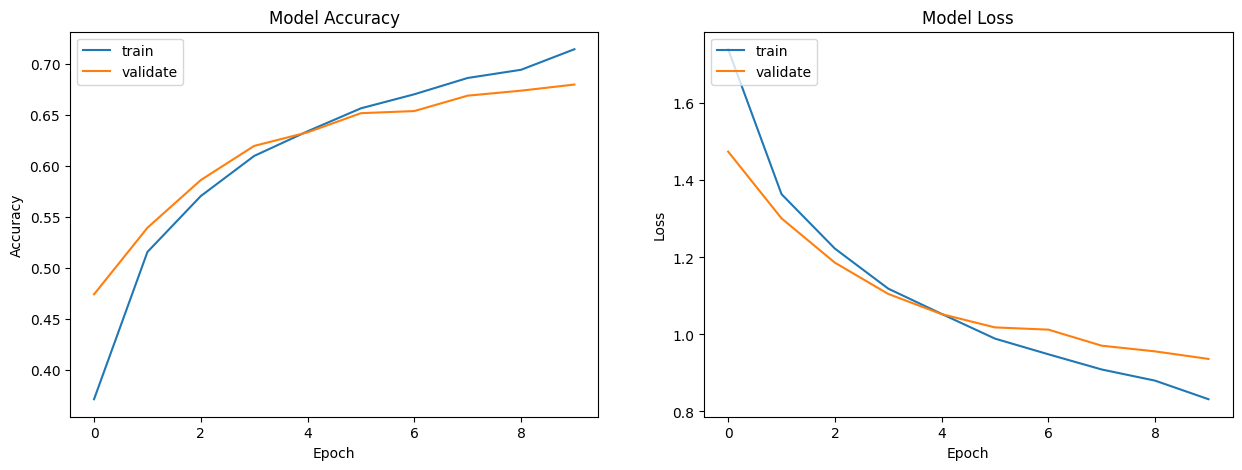

In [10]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

# IMPORTANT hyper parameter comments

* The hyperparameters that were tuned were the model's optimizers, epochs and learning rate
* The optimizers that were tested were SGD, Adam and RMSprop. The best one was Adam, but RMSprop was very close
* The learning rates that were tested were 0.001, 0.01, 0.05, 0.1. 0.05 was the best for RMSprop but the best for adam, the chosen learning rate was 0.001   

# My Notes

Clearly this accuracy and loss is objectively bad. It is better than an a random guess, which would have an accuracy of 10%. However this is not good enough. We will perform hyper parameter tuning with this model. Then add batchnorm layers and drop out layers which might give better results. What that might allow us to do is to run the model for more epochs without worrying about overfitting. Currently the model hasnt learnt much and might be overfitting as the difference between the validation loss and training loss is increasing  

### Train the model on the entire training set


In [11]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model = Sequential()

# conv layer 1
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        input_shape=(32,32,3),
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
#model.add(BatchNormalization())
# conv layer 2
model.add(
    Conv2D(
        filters=64,
        kernel_size=4,
        strides=1,
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
#model.add(BatchNormalization())

# Flatten
model.add(Flatten())
#model.add(Dropout(0.5))
# Dense 1
model.add(Dense(units=256, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))

# Dense 2
model.add(Dense(units=ytrain.shape[1], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [12]:
#<Train your model on the entire training set (50K samples)>
# Define model optimizer and loss function
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model and store model parameters/loss values
history = model.fit(
    train/255.0,
    trainlabels,
    batch_size=500,
    epochs=10,
)

Epoch 1/10
100/100 [==============================] - 58s 575ms/step - loss: 1.6655 - accuracy: 0.4067
Epoch 2/10
100/100 [==============================] - 57s 569ms/step - loss: 1.3138 - accuracy: 0.5354
Epoch 3/10
100/100 [==============================] - 56s 558ms/step - loss: 1.1795 - accuracy: 0.5874
Epoch 4/10
100/100 [==============================] - 56s 562ms/step - loss: 1.0941 - accuracy: 0.6179
Epoch 5/10
100/100 [==============================] - 57s 566ms/step - loss: 1.0250 - accuracy: 0.6426
Epoch 6/10
100/100 [==============================] - 56s 564ms/step - loss: 0.9737 - accuracy: 0.6613
Epoch 7/10
100/100 [==============================] - 56s 564ms/step - loss: 0.9209 - accuracy: 0.6816
Epoch 8/10
100/100 [==============================] - 56s 563ms/step - loss: 0.8801 - accuracy: 0.6962
Epoch 9/10
100/100 [==============================] - 56s 562ms/step - loss: 0.8452 - accuracy: 0.7076
Epoch 10/10
100/100 [==============================] - 56s 563ms/step - l

## 5. Evaluate the model on the test set

In [14]:
# Evaluate your model performance (testing accuracy) on testing data.
score = model.evaluate(xtest/255.0, ytest, verbose=1)

313/313 [==============================] - 4s 13ms/step - loss: 0.9029 - accuracy: 0.6862


## Experimenting with new structures

# model 1:

## structure

* add a dropout layer before every dense layer (why? Because the dense layers are the main ones benifitting from  dropout. Conv layers dont benefit much from dropout becuase there are too few parameters (this is an assumption))
* Add a batch norm layer after every layer. That is, add batch norm in front of both conv and dense layers
* Using the same parameters and same network structure   

In [15]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model = Sequential()

# conv layer 1
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        input_shape=(32,32,3),
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
# conv layer 2
model.add(
    Conv2D(
        filters=64,
        kernel_size=4,
        strides=1,
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())
# Dense 1
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())


# Dense 2
model.add(Dense(units=ytrain.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                      

In [16]:
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model and store model parameters/loss values
history = model.fit(
    xtrain,
    ytrain,
    batch_size=500,
    epochs=30,
    validation_data=(validation, validation_label),
)

Epoch 1/30
80/80 [==============================] - 57s 702ms/step - loss: 1.5937 - accuracy: 0.4610 - val_loss: 3.1635 - val_accuracy: 0.1019
Epoch 2/30
80/80 [==============================] - 55s 684ms/step - loss: 1.1162 - accuracy: 0.6059 - val_loss: 5.2830 - val_accuracy: 0.1019
Epoch 3/30
80/80 [==============================] - 54s 672ms/step - loss: 0.9454 - accuracy: 0.6720 - val_loss: 6.7416 - val_accuracy: 0.1019
Epoch 4/30
80/80 [==============================] - 55s 685ms/step - loss: 0.8276 - accuracy: 0.7118 - val_loss: 7.2606 - val_accuracy: 0.1027
Epoch 5/30
80/80 [==============================] - 54s 678ms/step - loss: 0.7337 - accuracy: 0.7436 - val_loss: 7.2843 - val_accuracy: 0.1042
Epoch 6/30
80/80 [==============================] - 55s 685ms/step - loss: 0.6622 - accuracy: 0.7701 - val_loss: 4.3256 - val_accuracy: 0.2065
Epoch 7/30
80/80 [==============================] - 54s 678ms/step - loss: 0.5787 - accuracy: 0.8012 - val_loss: 1.8867 - val_accuracy: 0.4453

In [18]:
score2 = model.evaluate(xtest/255.0, ytest)

313/313 [==============================] - 4s 14ms/step - loss: 1.3244 - accuracy: 0.7113


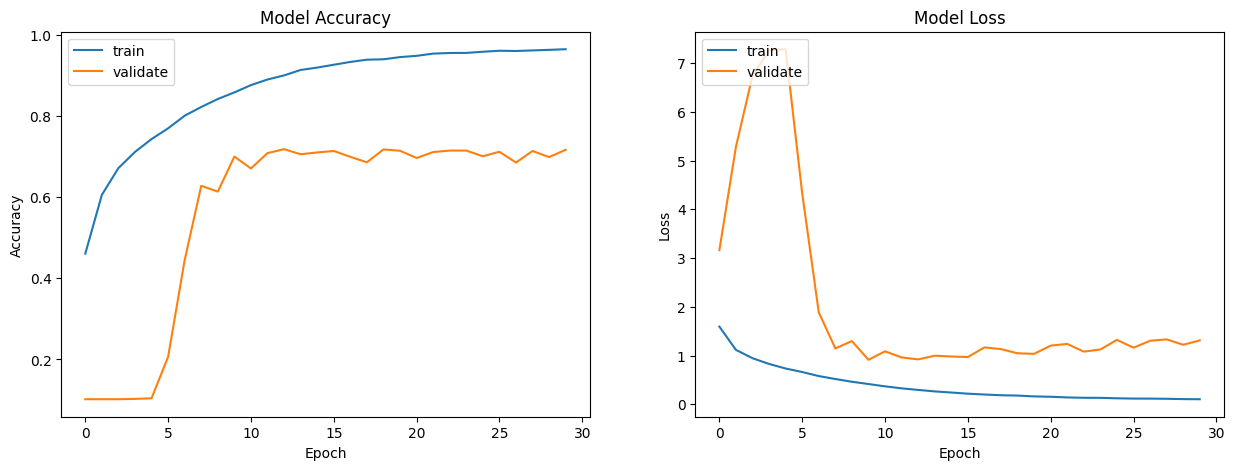

In [19]:
plotmodelhistory(history)

* Significant improvement compared to our base model
* Test accuracy has also increased from 42 to 72.

# Comments

* adding batch norm and dropout layer has helped significantly.
* Lets test by adding a dropout layer for the conv layers too

# model 2

* add a dropout layer after every layer conv and dense alike. However the dropout of the conv layer's probability will be lesser
* Add a batch norm layer after every layer. That is, add batch norm in front of both conv and dense layers
* Using the same parameters and same network structure   

In [20]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model = Sequential()

# conv layer 1
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        input_shape=(32,32,3),
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(BatchNormalization())
# conv layer 2
model.add(
    Conv2D(
        filters=64,
        kernel_size=4,
        strides=1,
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())
# Dense 1
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())


# Dense 2
model.add(Dense(units=ytrain.shape[1], activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 15, 15, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)         

In [21]:
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model and store model parameters/loss values
history = model.fit(
    xtrain,
    ytrain,
    batch_size=500,
    epochs=30,
    validation_data=(validation, validation_label),
)

Epoch 1/30
80/80 [==============================] - 60s 735ms/step - loss: 1.8819 - accuracy: 0.3626 - val_loss: 3.5278 - val_accuracy: 0.1020
Epoch 2/30
80/80 [==============================] - 57s 718ms/step - loss: 1.4172 - accuracy: 0.4981 - val_loss: 6.8134 - val_accuracy: 0.1019
Epoch 3/30
80/80 [==============================] - 57s 715ms/step - loss: 1.2511 - accuracy: 0.5552 - val_loss: 8.2597 - val_accuracy: 0.1019
Epoch 4/30
80/80 [==============================] - 57s 710ms/step - loss: 1.1493 - accuracy: 0.5911 - val_loss: 7.8097 - val_accuracy: 0.1019
Epoch 5/30
80/80 [==============================] - 57s 708ms/step - loss: 1.0710 - accuracy: 0.6195 - val_loss: 7.2997 - val_accuracy: 0.1020
Epoch 6/30
80/80 [==============================] - 57s 709ms/step - loss: 1.0177 - accuracy: 0.6393 - val_loss: 5.7763 - val_accuracy: 0.1076
Epoch 7/30
80/80 [==============================] - 57s 714ms/step - loss: 0.9629 - accuracy: 0.6615 - val_loss: 3.6779 - val_accuracy: 0.1878

In [23]:
model.evaluate(xtest/255.0, ytest)

313/313 [==============================] - 4s 14ms/step - loss: 0.7540 - accuracy: 0.7572


[0.7540432810783386, 0.7572000026702881]

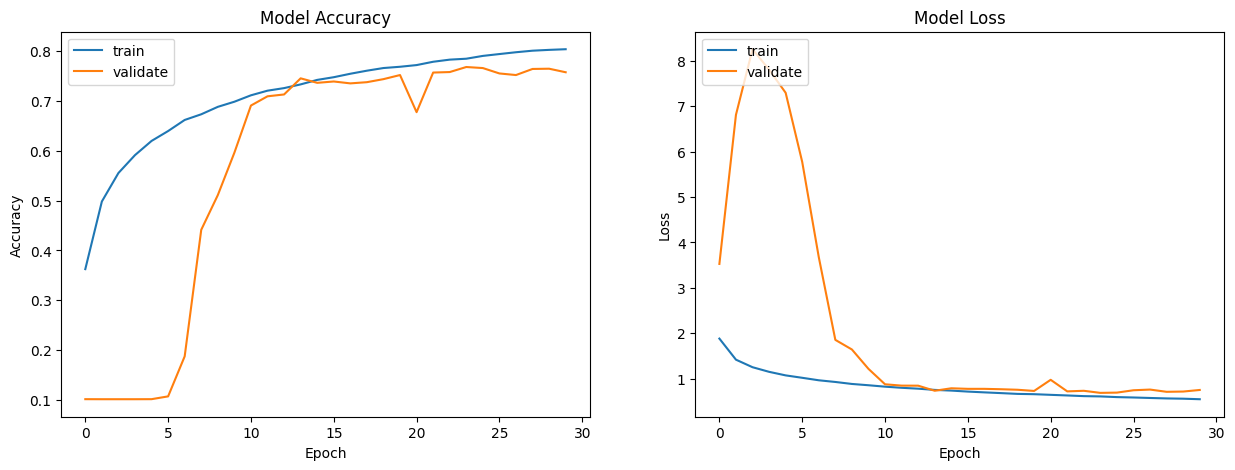

In [24]:
plotmodelhistory(history)

* The model is overfitting, need to add more dropout and batch norm layers and reduce overall complexity
* This was considerably better. Maybe conv layers do need Dropout
* However the accuracy has not increased by much
* Howveer this has prevented overfitting which means more complex models will benefit from dropouts in the conv layer

# Comemnts

 * Attempt 3 will be to change the model structure, add more conv layers and maybe an extra dense Layer?

# structure

* Doubling the number of layers might help.
* Conv2d -> Maxpool -> Conv2D -> Maxpool -> Conv2D -> Maxpool -> Conv2D -> Maxpool -> Flatten -> Dense -> Dense -> output

In [25]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
model = Sequential()

# conv layer 1
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        input_shape=(32,32,3),
        activation='relu'
    )
)
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
# conv layer 2
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        strides=1,
        activation='relu'
    )
)
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
# conv layer 3
model.add(
    Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        activation='relu'
    )
)
model.add(Dropout(0.3))
model.add(BatchNormalization())
# Conv layer 4
model.add(
    Conv2D(
        filters=64,
        kernel_size=3,
        strides=1,
        activation='relu'
    )
)
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
# Flatten
model.add(Flatten())
# Dense 1
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())


# Dense 2
model.add(Dense(units=ytrain.shape[1], activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 15, 15, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)       

In [26]:
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model and store model parameters/loss values
history = model.fit(
    xtrain,
    ytrain,
    batch_size=500,
    epochs=30,
    validation_data=(validation, validation_label),
)

Epoch 1/30
80/80 [==============================] - 62s 760ms/step - loss: 2.3239 - accuracy: 0.2158 - val_loss: 2.2993 - val_accuracy: 0.1486
Epoch 2/30
80/80 [==============================] - 59s 739ms/step - loss: 1.7757 - accuracy: 0.3439 - val_loss: 2.4289 - val_accuracy: 0.1018
Epoch 3/30
80/80 [==============================] - 60s 747ms/step - loss: 1.5833 - accuracy: 0.4110 - val_loss: 2.4714 - val_accuracy: 0.1617
Epoch 4/30
80/80 [==============================] - 59s 739ms/step - loss: 1.4704 - accuracy: 0.4599 - val_loss: 2.5883 - val_accuracy: 0.1282
Epoch 5/30
80/80 [==============================] - 59s 738ms/step - loss: 1.3894 - accuracy: 0.4945 - val_loss: 2.6283 - val_accuracy: 0.1599
Epoch 6/30
80/80 [==============================] - 59s 744ms/step - loss: 1.3267 - accuracy: 0.5243 - val_loss: 2.7090 - val_accuracy: 0.1808
Epoch 7/30
80/80 [==============================] - 59s 742ms/step - loss: 1.2714 - accuracy: 0.5471 - val_loss: 2.4097 - val_accuracy: 0.2136

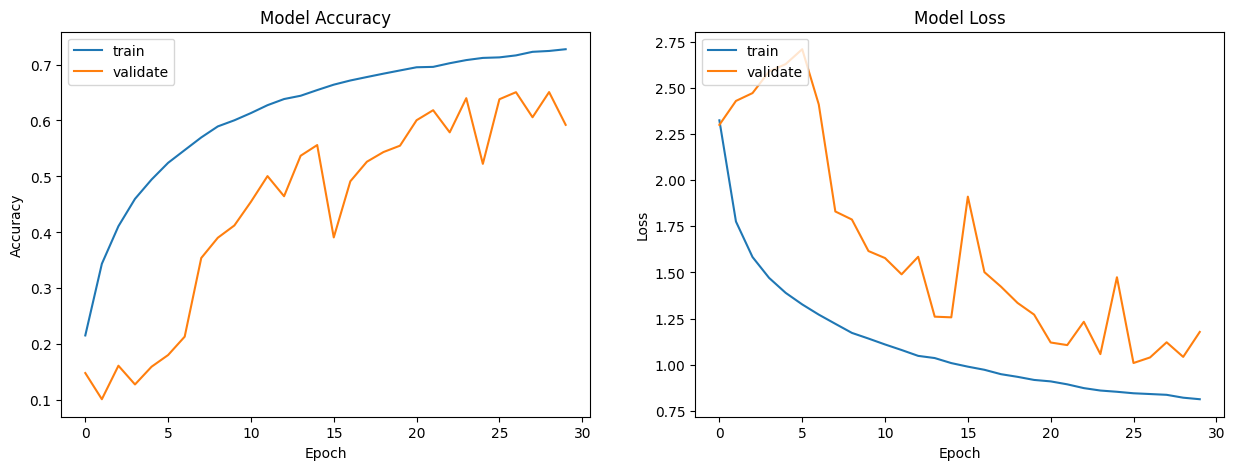

In [28]:
plotmodelhistory(history)

# comments

* My initial asusmtion was wrong, the model is now overfitting
* Maybe the best model is the second one after all
*